# Gaming Titans: Microsoft vs. Sony vs. Nintendo

## Table of Contents

[Background](#background)
- [Data Source](#data_source)
- [Questions to Answer](#allquestions)

Project
1. [Importing Libraries and Data](#import_data)
2. [Data Cleaning](#data_cleaning)
3. [Data Analysis](#data_analysis)
    - [Q1) Are Nintendo, Sony, and Microsoft ("big 3") the top three gaming companies in terms of gaming unit sales?](#question1)
    - [Q2) Which firm exhibits the highest average units sold per platform?](#question2)
    - [Q3) What are the most popular platform types for each of the "big 3" gaming companies?](#question3)
    - [Q4) Which platforms have shown exceptional performance for each gaming company?](#question4)

[Conclusion](#conclusion)

[Future Direction](#future_direction)

---


# Background <a name="background"></a>

As a former Xbox player and passionate gamer, I've always been curious about how Microsoft stacks up against its fierce rivals, Sony and Nintendo, in the gaming universe. This project sets out to explore the sales performance and platform popularity of these gaming giants, offering valuable insights into their competitive edge in the gaming industry. Get ready to witness the clash of gaming titans and discover what sets each of them apart in this thrilling gaming journey.

## Data Source <a name="data_source"></a>

This data source for this analysis was obtained from a Wikipedia page [List of best-selling game consoles](https://en.wikipedia.org/wiki/List_of_best-selling_game_consoles).

## Questions to Answer <a name="allquestions"></a>

1. Are Nintendo, Sony, and Microsoft ("big 3") the top three gaming companies in terms of unit sales?
2. Which firm exhibits the highest average units sold per platform?
3. What are the most popular platform types for each of the "big 3" gaming companies?
4. Which platforms have shown exceptional performance for each gaming company?

# 1) Importing Libraries and Extracting the Data <a name="import_data"></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.ticker as ticker
from pandas.io.html import read_html
from rich import print
from rich.style import Style
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

url = 'https://en.wikipedia.org/wiki/List_of_best-selling_game_consoles'

In [2]:
# Extracts wikitables from the url
switch_wiki = read_html(url, attrs={'class':'wikitable'})

# Tells me how many tables I've scraped
print('Extracted {num} wikitables'.format(num=len(switch_wiki)))

Extracted 1 wikitables

In [3]:
switch_wiki[0].head()

,Platform,Type,Firm,Released[2],Units sold,Ref.
0,PlayStation 2,Home,Sony,2000,>155 million,[note 1]
1,Nintendo DS,Handheld,Nintendo,2004,154.02 million,[30]
2,Nintendo Switch #‡,Hybrid,Nintendo,2017,129.53 million,[30][note 2]
3,Game Boy & Game Boy Color,Handheld,Nintendo,"1989, 1998",118.69 million,[30][note 3]
4,PlayStation 4 #,Home,Sony,2013,117.2 million,[34]


In [4]:
console_sales = switch_wiki[0]

# 2) Data Cleaning and Preprocessing <a name="data_cleaning"></a>

In [5]:
console_sales.columns

Index(['Platform', 'Type', 'Firm', 'Released[2]', 'Units sold', 'Ref.'], dtype='object')

In [6]:
# Don't want spaces in column names and release_year is more interpretable
console_sales = console_sales.rename(columns={'Released[2]': 'Release_Year',
                              'Units sold': 'Units_Sold'})

In [7]:
console_sales.dtypes

Platform        object
Type            object
Firm            object
Release_Year    object
Units_Sold      object
Ref.            object
dtype: object

### Why is the release year an object? & Units sold should be a float column

In [8]:
console_sales

,Platform,Type,Firm,Release_Year,Units_Sold,Ref.
0,PlayStation 2,Home,Sony,2000,>155 million,[note 1]
1,Nintendo DS,Handheld,Nintendo,2004,154.02 million,[30]
2,Nintendo Switch #‡,Hybrid,Nintendo,2017,129.53 million,[30][note 2]
3,Game Boy & Game Boy Color,Handheld,Nintendo,"1989, 1998",118.69 million,[30][note 3]
4,PlayStation 4 #,Home,Sony,2013,117.2 million,[34]
5,PlayStation,Home,Sony,1994,102.49 million,[35]
6,Wii,Home,Nintendo,2006,101.63 million,[30]
7,PlayStation 3,Home,Sony,2006,>87.4 million,[note 1]
8,Xbox 360,Home,Microsoft,2005,>84 million,[note 4]
9,Game Boy Advance,Handheld,Nintendo,2001,81.51 million,[30]


### I noticed one of the release year entries had 2 years for the gameboy and gameboy color because Nintendo only provided a combined sales number. So we will use the earliest release date

In [9]:
console_sales.loc[3,'Release_Year'] = 1989
console_sales.head()

,Platform,Type,Firm,Release_Year,Units_Sold,Ref.
0,PlayStation 2,Home,Sony,2000,>155 million,[note 1]
1,Nintendo DS,Handheld,Nintendo,2004,154.02 million,[30]
2,Nintendo Switch #‡,Hybrid,Nintendo,2017,129.53 million,[30][note 2]
3,Game Boy & Game Boy Color,Handheld,Nintendo,1989,118.69 million,[30][note 3]
4,PlayStation 4 #,Home,Sony,2013,117.2 million,[34]


In [10]:
console_sales['Release_Year'] = console_sales['Release_Year'].astype(int)
console_sales.dtypes

Platform        object
Type            object
Firm            object
Release_Year     int32
Units_Sold      object
Ref.            object
dtype: object

### In some rows the units sold is provided as a range. For the purpose of this analysis we will use the midpoint of this range.

In [11]:
#Identifying all columns with a range
rows_with_dash = console_sales[console_sales['Units_Sold'].str.contains('–')]
rows_with_dash

,Platform,Type,Firm,Release_Year,Units_Sold,Ref.
10,PlayStation Portable,Handheld,Sony,2004,80–82 million (estimate),[note 1]
25,PlayStation Vita,Handheld,Sony,2011,10–15 million (estimate),[note 1]
26,Master System,Home,Sega,1986,10–13 million,[note 6]
56,Oculus Quest,VR headset,Oculus,2010,"317,000–1 million (estimate)",[103][104]


In [12]:
#Keeping everything a string value for easier manipulations in the next step
console_sales.loc[10,'Units_Sold'] = '81'
console_sales.loc[25,'Units_Sold'] = '12.5'
console_sales.loc[26,'Units_Sold'] = '11.5'
console_sales.loc[56,'Units_Sold'] = '0.66'

In [13]:
console_sales.head()

,Platform,Type,Firm,Release_Year,Units_Sold,Ref.
0,PlayStation 2,Home,Sony,2000,>155 million,[note 1]
1,Nintendo DS,Handheld,Nintendo,2004,154.02 million,[30]
2,Nintendo Switch #‡,Hybrid,Nintendo,2017,129.53 million,[30][note 2]
3,Game Boy & Game Boy Color,Handheld,Nintendo,1989,118.69 million,[30][note 3]
4,PlayStation 4 #,Home,Sony,2013,117.2 million,[34]


### We will be removing all non numeric characters from the Units Sold column

In [14]:
console_sales['Units_Sold'] = console_sales['Units_Sold'].str.replace(r'[^0-9.]','', regex=True)
console_sales

,Platform,Type,Firm,Release_Year,Units_Sold,Ref.
0,PlayStation 2,Home,Sony,2000,155,[note 1]
1,Nintendo DS,Handheld,Nintendo,2004,154.02,[30]
2,Nintendo Switch #‡,Hybrid,Nintendo,2017,129.53,[30][note 2]
3,Game Boy & Game Boy Color,Handheld,Nintendo,1989,118.69,[30][note 3]
4,PlayStation 4 #,Home,Sony,2013,117.2,[34]
5,PlayStation,Home,Sony,1994,102.49,[35]
6,Wii,Home,Nintendo,2006,101.63,[30]
7,PlayStation 3,Home,Sony,2006,87.4,[note 1]
8,Xbox 360,Home,Microsoft,2005,84,[note 4]
9,Game Boy Advance,Handheld,Nintendo,2001,81.51,[30]


In [15]:
# Convert the column to float and rounded to 2 decimal places
console_sales['Units_Sold'] = round(console_sales['Units_Sold'].astype(float),2)
console_sales.head()

,Platform,Type,Firm,Release_Year,Units_Sold,Ref.
0,PlayStation 2,Home,Sony,2000,155.00,[note 1]
1,Nintendo DS,Handheld,Nintendo,2004,154.02,[30]
2,Nintendo Switch #‡,Hybrid,Nintendo,2017,129.53,[30][note 2]
3,Game Boy & Game Boy Color,Handheld,Nintendo,1989,118.69,[30][note 3]
4,PlayStation 4 #,Home,Sony,2013,117.20,[34]


In [16]:
# Adding per million to column header
console_sales = console_sales.rename(columns = {'Units_Sold':'Units_Sold (per million)'})
console_sales.head()

,Platform,Type,Firm,Release_Year,Units_Sold (per million),Ref.
0,PlayStation 2,Home,Sony,2000,155.00,[note 1]
1,Nintendo DS,Handheld,Nintendo,2004,154.02,[30]
2,Nintendo Switch #‡,Hybrid,Nintendo,2017,129.53,[30][note 2]
3,Game Boy & Game Boy Color,Handheld,Nintendo,1989,118.69,[30][note 3]
4,PlayStation 4 #,Home,Sony,2013,117.20,[34]


### Ref. is a column in wikipedia that shows links to where the data was retrieved. It's great for credibility but unnecessary for our analysis

In [17]:
console_sales = console_sales.drop('Ref.', axis=1)
console_sales.head(10)

,Platform,Type,Firm,Release_Year,Units_Sold (per million)
0,PlayStation 2,Home,Sony,2000,155.00
1,Nintendo DS,Handheld,Nintendo,2004,154.02
2,Nintendo Switch #‡,Hybrid,Nintendo,2017,129.53
3,Game Boy & Game Boy Color,Handheld,Nintendo,1989,118.69
4,PlayStation 4 #,Home,Sony,2013,117.20
5,PlayStation,Home,Sony,1994,102.49
6,Wii,Home,Nintendo,2006,101.63
7,PlayStation 3,Home,Sony,2006,87.40
8,Xbox 360,Home,Microsoft,2005,84.00
9,Game Boy Advance,Handheld,Nintendo,2001,81.51


# 3) Data Analysis (Answering Questions) <a name="data_analysis"></a>

## Q1. Are Nintendo, Sony, and Microsoft ("big 3") the top three gaming companies in terms of gaming unit sales? <a name="question1"></a>

In [18]:
sales_by_firm = console_sales.groupby('Firm')['Units_Sold (per million)'].sum().sort_values(ascending=False).reset_index()
sales_by_firm

,Firm,Units_Sold (per million)
0,Nintendo,900.30
1,Sony,595.59
2,Microsoft,187.00
3,Sega,83.00
4,Atari,33.00
5,Reality Labs / Meta,20.00
6,Tectoy,11.00
7,NEC/Hudson Soft[note 7],10.00
8,Micro Genius,7.00
9,Bandai,3.50


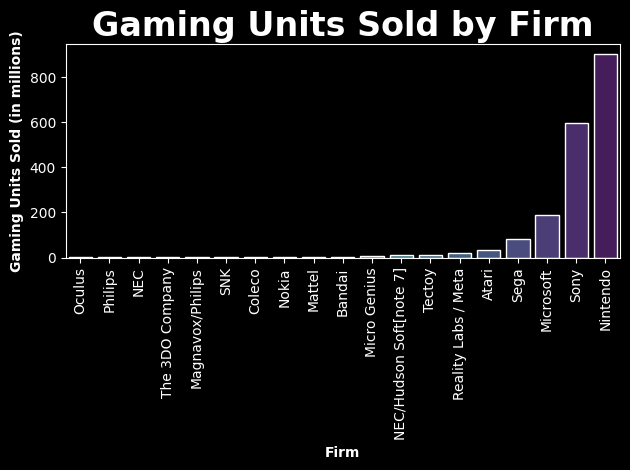

In [19]:
plt.style.use('dark_background')

sns.barplot(sales_by_firm, x='Firm', y ='Units_Sold (per million)', palette = 'viridis',edgecolor = 'white')

plt.title('Gaming Units Sold by Firm', weight='bold').set_fontsize(24)
plt.xlabel('Firm', weight = 'bold', color= 'white')
plt.ylabel('Gaming Units Sold (in millions)', weight = 'bold', color = 'white')
plt.gca().invert_xaxis()
plt.xticks(rotation = 90, color = 'white')
plt.yticks(color = 'white')

plt.savefig('C:\\Users\\kidsa\\OneDrive\\Documents\\Data Driven Projects\\Data Analytic Projects\\Gaming_Titans_proj\\figures\\sales_by_firm.png',bbox_inches='tight')
plt.show()

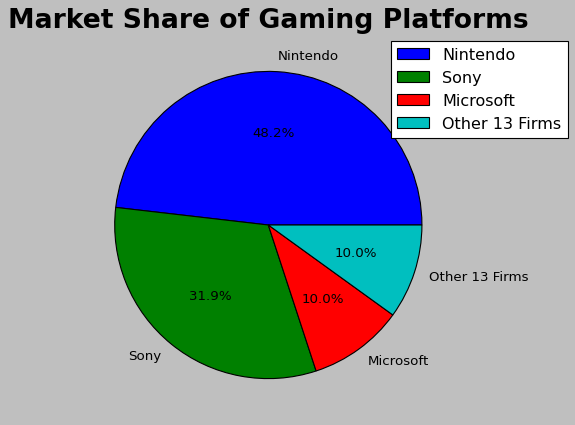

In [20]:
units_by_firm = sales_by_firm['Units_Sold (per million)']

plt.style.use('dark_background')

# Grouping every firm not in the top 3 into an other category
threshold = 100
other_values = [value for value in units_by_firm if value < threshold]
other_sum = sum(other_values)
values = [value if value >= threshold else 0 for value in units_by_firm]
values.append(other_sum)
values = [value for value in values if value != 0]

labels = ['Nintendo','Sony','Microsoft','Other 13 Firms']
labels = list(map(str,labels))

plt.style.use('classic')

plt.pie(values, labels = labels, autopct = '%1.1f%%')
plt.legend(labels, loc = 'upper right', bbox_to_anchor=(1.3,1))
plt.title('Market Share of Gaming Platforms', weight = 'bold').set_fontsize(24)

plt.savefig('C:\\Users\\kidsa\\OneDrive\\Documents\\Data Driven Projects\\Data Analytic Projects\\Gaming_Titans_proj\\figures\\market_share.png')
plt.show()

## Yes, the "big 3" are the top three gaming companies in terms of gaming unit sales in this order:

### 1. Nintendo

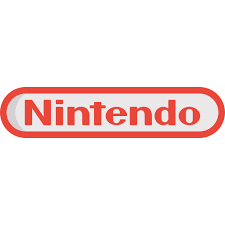

### 2. Sony

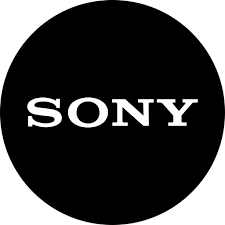

### 3. Microsoft

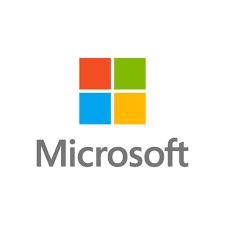

## In fact, Nintendo, Sony, & Microsoft account for 90% of gaming units sold

### After answering this question, we can see that Nintendo is clearly dominating in unit sales. I know that  Nintendo's been around the longest and this could be a possible reason for their domination in sales. This leaves me wondering these questions:

### Subquestion: 1.1) What's the earliest release year for each firm?
### Subquestion: 1.2) How have sales looked while in competition?

#### Creating a new table exclusively featuring data from Nintendo, Sony, and Microsoft

In [21]:
big_three = console_sales.query("Firm == 'Sony' | Firm == 'Nintendo' | Firm == 'Microsoft'")

# Re-number the index so it's in order
big_three = big_three.reset_index().drop('index',axis=1)
big_three.head()

,Platform,Type,Firm,Release_Year,Units_Sold (per million)
0,PlayStation 2,Home,Sony,2000,155.00
1,Nintendo DS,Handheld,Nintendo,2004,154.02
2,Nintendo Switch #‡,Hybrid,Nintendo,2017,129.53
3,Game Boy & Game Boy Color,Handheld,Nintendo,1989,118.69
4,PlayStation 4 #,Home,Sony,2013,117.20


#### Table answering question 1.1

In [22]:
big_three.groupby('Firm')['Release_Year'].min().sort_values(ascending=True).reset_index()

,Firm,Release_Year
0,Nintendo,1977
1,Sony,1994
2,Microsoft,2001


#### Answering question 1.2

In [23]:
# Table for each individual firm
nintendo = big_three.query("Firm == 'Nintendo'")
sony = big_three.query("Firm == 'Sony'")
microsoft = big_three.query("Firm == 'Microsoft'")

# Total units sold for each firm
total_nin_sales = sales_by_firm.query("Firm == 'Nintendo'")['Units_Sold (per million)'][0]
total_sony_sales = sales_by_firm.query("Firm == 'Sony'")['Units_Sold (per million)'][1]
total_micro_sales = sales_by_firm.query("Firm == 'Microsoft'")['Units_Sold (per million)'][2]

# How many units have Nintendo sold before Sony released their first platform?
n_sony = round(nintendo.query("Release_Year < 1994")['Units_Sold (per million)'].sum(),2)

# How many units have Nintendo sold before Microsoft released their first platform?
n_micro = round(nintendo.query("Release_Year < 2001")['Units_Sold (per million)'].sum(),2)

# How many units have Sony sold before before Microsoft released their first platform?
s_micro = round(sony.query("Release_Year < 2001")['Units_Sold (per million)'].sum(),2)


print('[bold]Units Sold Without Competition[/bold]')
print('Nintendo has sold ' + str(n_sony) + ' million units while Sony was not a competitor.')
print('Nintendo has sold ' + str(n_micro) + ' million units while Microsoft was not a competitor.')
print('Sony has sold ' + str(s_micro) + ' million units while Microsoft was not a competitor.')
print('')
print('[bold]Units Sold With Competition[/bold]')
print('Nintendo has sold ' + str(round(total_nin_sales - n_sony,2)) + ' million units and Sony has sold ' + str(total_sony_sales) + ' million units while in competition.')
print('Sony has sold ' + str(total_sony_sales - s_micro) + ' million units and Microsoft has sold ' + str(total_micro_sales) + ' million units while in competition.')
print('Nintendo has sold ' + str(total_nin_sales - n_micro) + ' million units and Sony has sold ' + str(total_sony_sales - s_micro) + ' million units and Microsoft has sold ' + str(total_micro_sales) + ' million units while in competition.')

Units Sold Without Competition

Nintendo has sold 280.6 million units while Sony was not a competitor.

Nintendo has sold 313.53 million units while Microsoft was not a competitor.

Sony has sold 257.49 million units while Microsoft was not a competitor.

Units Sold With Competition

Nintendo has sold 619.7 million units and Sony has sold 595.59 million units while in competition.

Sony has sold 338.1 million units and Microsoft has sold 187.0 million units while in competition.

Nintendo has sold 586.77 million units and Sony has sold 338.1 million units and Microsoft has sold 187.0 million 
units while in competition.

### Nintendo, being the oldest player in the gaming industry, has witnessed extensive success, selling millions of units over the years. During this time, Sony and Microsoft were not direct competitors. Nevertheless, even in the face of competition from both Sony and Microsoft, Nintendo has remarkably outperformed both of its rivals while consistently producing successful gaming platforms.

## Q2. Which firm exhibits the highest average units sold per platform? <a name="question2"></a>

In [24]:
platform_count = big_three.groupby('Firm')['Platform'].count().reset_index()
platform_count

,Firm,Platform
0,Microsoft,4
1,Nintendo,16
2,Sony,7


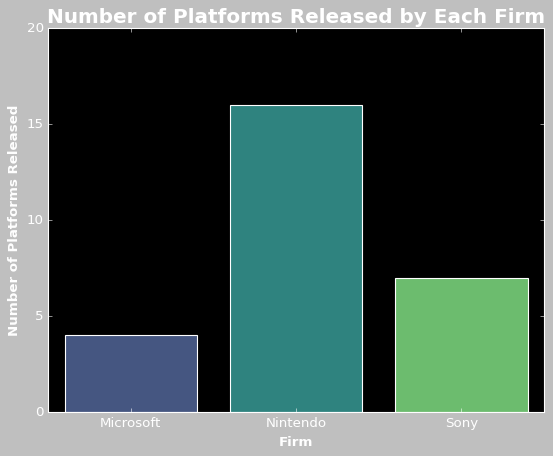

In [25]:
plt.figure(figsize=(8,6))
plt.style.use('dark_background')

sns.barplot(platform_count, x='Firm', y='Platform', palette= 'viridis', edgecolor = 'white')

plt.xlabel('Firm', weight='bold')
plt.ylabel('Number of Platforms Released', weight ='bold')
plt.title('Number of Platforms Released by Each Firm', weight='bold').set_fontsize(18)
plt.ylim(0,20)

plt.savefig('C:\\Users\\kidsa\\OneDrive\\Documents\\Data Driven Projects\\Data Analytic Projects\\Gaming_Titans_proj\\figures\\number_of_platforms.png',bbox_inches='tight')

plt.show()

### Nintendo has surpassed its competitors by releasing more platforms than both of them combined

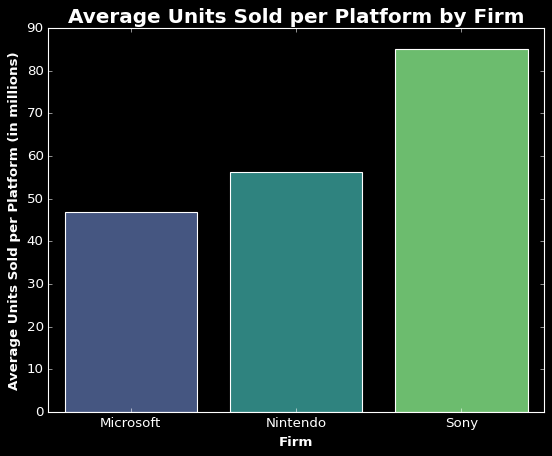

In [26]:
plt.figure(figsize=(8,6))
plt.style.use('dark_background')

count_plat = big_three.groupby('Firm')['Platform'].count()
unit_sales = big_three.groupby('Firm')['Units_Sold (per million)'].sum()

sales_per_platform = round(unit_sales / count_plat, 1).reset_index()

sns.barplot(sales_per_platform ,x='Firm', y=0, palette = 'viridis',edgecolor = 'white')
plt.xlabel('Firm', weight='bold')
plt.ylabel('Average Units Sold per Platform (in millions)', weight='bold')
plt.title('Average Units Sold per Platform by Firm', weight='bold').set_fontsize(18)

plt.savefig('C:\\Users\\kidsa\\OneDrive\\Documents\\Data Driven Projects\\Data Analytic Projects\\Gaming_Titans_proj\\figures\\average_sales_per_platform',bbox_inches='tight')

plt.show()

Despite Nintendo's extensive platform releases, Sony outshines them in terms of popularity per platform. The data indicates that Sony achieved an average of 85.1 million unit sales per platform, surpassing both Nintendo's 56.0 million and Microsoft's 46.8 million unit sales. This suggests that Sony's platforms have garnered higher levels of popularity and success on average compared to its competitors.

## Sony has the highest average units sold by platform

## Q3. What are the most popular platform types for each of the "big 3" gaming companies? <a name="question3"></a>

In [27]:
# Shows a table of cumulative sales per Device
type_device = big_three.groupby('Type')['Units_Sold (per million)'].sum().reset_index()
type_device

,Type,Units_Sold (per million)
0,Dedicated,11.84
1,Handheld,567.06
2,Home,969.96
3,Home console add-on,4.50
4,Hybrid,129.53


In [28]:
# Table that shows the same thing by broken down by Firm
units_by_type = pd.pivot_table(big_three, index ='Type', columns ='Firm', values ='Units_Sold (per million)', aggfunc='sum').fillna(0)
units_by_type

Firm,Microsoft,Nintendo,Sony
Type,,,
Dedicated,0.0,11.84,0.00
Handheld,0.0,473.56,93.50
Home,187.0,280.87,502.09
Home console add-on,0.0,4.50,0.00
Hybrid,0.0,129.53,0.00


In [29]:
# Table that can be plotted as a bar plot
sum_data = big_three.groupby(['Type', 'Firm'])['Units_Sold (per million)'].sum().reset_index()
sum_data

,Type,Firm,Units_Sold (per million)
0,Dedicated,Nintendo,11.84
1,Handheld,Nintendo,473.56
2,Handheld,Sony,93.50
3,Home,Microsoft,187.00
4,Home,Nintendo,280.87
5,Home,Sony,502.09
6,Home console add-on,Nintendo,4.50
7,Hybrid,Nintendo,129.53


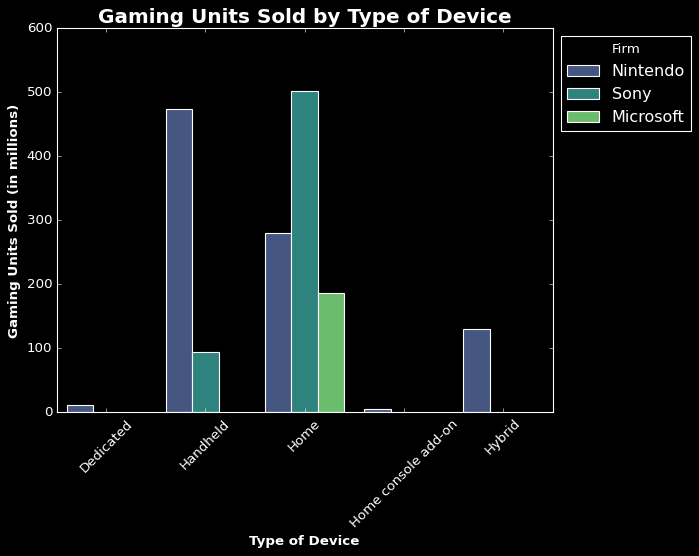

In [30]:
#Visualizes the table as a bar graph
plt.figure(figsize=(8,6))
plt.style.use('dark_background')

sns.barplot(sum_data, x = 'Type', y='Units_Sold (per million)',hue = 'Firm', errorbar=None, palette = 'viridis')
plt.xlabel('Type of Device', weight = 'bold')
plt.ylabel('Gaming Units Sold (in millions)', weight = 'bold')
plt.title('Gaming Units Sold by Type of Device', weight = 'bold').set_fontsize(18)
plt.legend(title='Firm', loc ='upper left', bbox_to_anchor=(1,1))
plt.xticks(rotation=45)

plt.savefig('C:\\Users\\kidsa\\OneDrive\\Documents\\Data Driven Projects\\Data Analytic Projects\\Gaming_Titans_proj\\figures\\sales_by_device',bbox_inches='tight')
plt.show()

## Main takeaways from this table and bar graph

1. Nintendo's strength lies in the "Handheld" category, where it outperforms both Microsoft and Sony.
2. Sony performs exceptionally well in the "Home" category, having the highest unit sales among the three firms.
3. Microsoft has unit sales recorded only in the "Home" category and does not have sales in the other device types.

## Q4. Which platforms have shown exceptional performance for each gaming company? <a name="question4"></a>

<Figure size 800x480 with 0 Axes>

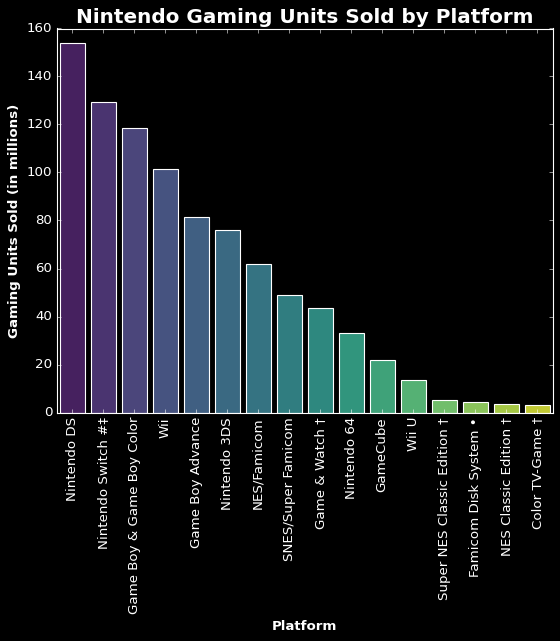

In [31]:
plt.figure(figsize=(10,6))
plt.figure('dark_background')

sns.barplot(nintendo, x = 'Platform', y='Units_Sold (per million)', palette='viridis')
plt.xlabel('Platform',weight='bold')
plt.ylabel('Gaming Units Sold (in millions)',weight='bold')
plt.title('Nintendo Gaming Units Sold by Platform',weight='bold').set_fontsize(18)
plt.xticks(rotation=90)

plt.savefig('C:\\Users\\kidsa\\OneDrive\\Documents\\Data Driven Projects\\Data Analytic Projects\\Gaming_Titans_proj\\figures\\top_nintendo_platforms', bbox_inches='tight')

plt.show()

In [32]:
nintendo.sort_values(by ='Units_Sold (per million)',ascending=False).drop(columns=['Type', 'Firm'],axis=1).head(3)

,Platform,Release_Year,Units_Sold (per million)
1,Nintendo DS,2004,154.02
2,Nintendo Switch #‡,2017,129.53
3,Game Boy & Game Boy Color,1989,118.69


## The top 3 platforms sold by Nintendo are:


### 1. Nintendo DS
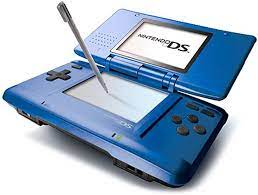

### 2. Nintendo Switch

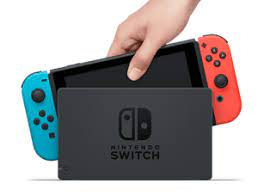

### 3. Game Boy & Game Boy Color

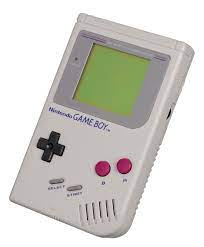

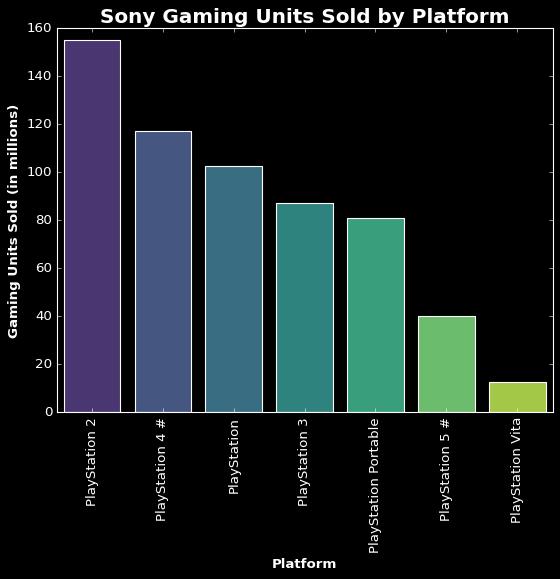

In [33]:
plt.figure('dark_background')

sns.barplot(sony, x = 'Platform', y='Units_Sold (per million)', palette='viridis')
plt.xlabel('Platform',weight='bold')
plt.ylabel('Gaming Units Sold (in millions)',weight='bold')
plt.title('Sony Gaming Units Sold by Platform',weight='bold').set_fontsize(18)
plt.xticks(rotation=90)

plt.savefig('C:\\Users\\kidsa\\OneDrive\\Documents\\Data Driven Projects\\Data Analytic Projects\\Gaming_Titans_proj\\figures\\top_sony_platforms.png', bbox_inches='tight')

plt.show()

In [34]:
sony.sort_values(by ='Units_Sold (per million)',ascending=False).drop(columns=['Type', 'Firm'],axis=1).head(3)

,Platform,Release_Year,Units_Sold (per million)
0,PlayStation 2,2000,155.00
4,PlayStation 4 #,2013,117.20
5,PlayStation,1994,102.49


## The top 3 platforms sold by Sony are:

### 1. Playstation 2
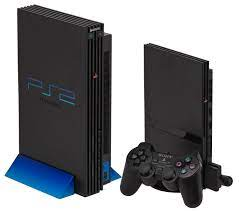

### 2. Playstation 4
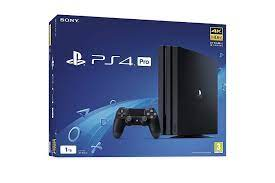

### 3. PlayStation 1
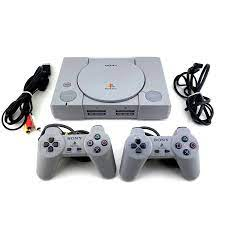

<Figure size 800x480 with 0 Axes>

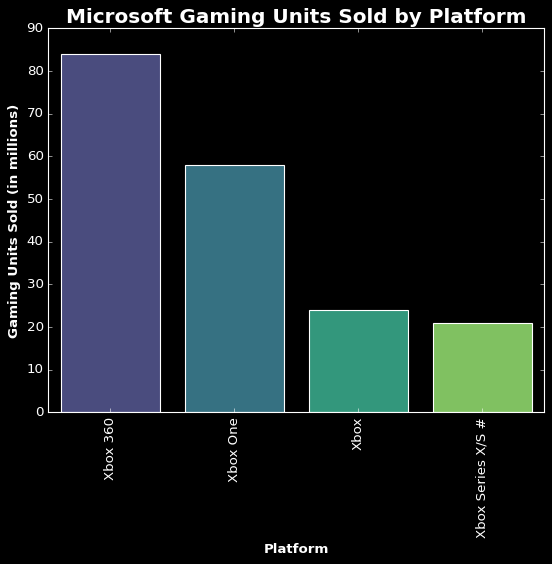

In [35]:
plt.figure(figsize=(10,6))
plt.figure('dark_background')

sns.barplot(microsoft, x = 'Platform', y='Units_Sold (per million)', palette='viridis')
plt.xlabel('Platform',weight='bold')
plt.ylabel('Gaming Units Sold (in millions)',weight='bold')
plt.title('Microsoft Gaming Units Sold by Platform',weight='bold').set_fontsize(18)
plt.xticks(rotation=90)

plt.savefig('C:\\Users\\kidsa\\OneDrive\\Documents\\Data Driven Projects\\Data Analytic Projects\\Gaming_Titans_proj\\figures\\top_microsoft_platforms', bbox_inches='tight')

plt.show()

In [36]:
microsoft.sort_values(by ='Units_Sold (per million)',ascending=False).drop(columns=['Type', 'Firm'],axis=1).head(3)

,Platform,Release_Year,Units_Sold (per million)
8,Xbox 360,2005,84.0
13,Xbox One,2013,58.0
18,Xbox,2001,24.0


## The top 3 platforms sold by Microsoft are:

### 1. Xbox 360
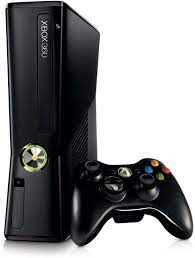

### 2. Xbox One
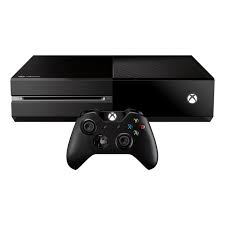

### 3. Original Xbox
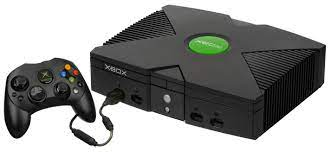

# Conclusion <a name="conclusion"></a>

After thoroughly analyzing the data, we can clearly see the competitive advantages and strategies employed by each gaming company. Nintendo has achieved remarkable success in total unit sales by cleverly introducing diverse gaming platforms that strongly resonate with their target audience.

On the other hand, Sony has demonstrated a different approach, excelling in garnering higher popularity per platform. This underscores their proficiency in developing captivating gaming systems that effectively capture consumer interest. Despite having fewer platforms than Nintendo, Sony's strong market appeal cannot be underestimated.

Microsoft, while not reaching the same unit sales as its competitors, has still managed to carve out a significant and noteworthy position in the gaming market. This indicates effective strategies and a dedicated customer base.

As the gaming industry continues to evolve, it is vital for each company to play to its strengths and adapt to emerging market trends. The insights from this analysis can serve as a foundation for informed decision-making and future planning, enabling them to sustain and enhance their respective market positions.

# Future Direction <a name="future_direction"></a>

It's worth highlighting that the success of gaming publishers cannot be solely measured by the sale of gaming units. Other performance metrics, such as the sale of gaming subscriptions, play a significant role and warrant further exploration. This aspect could potentially explain Microsoft's relatively subdued presence in comparison to Sony and Nintendo.

To gain deeper insights into the market positions and strategies of these gaming giants, a comprehensive investigation, especially focusing on gaming subscriptions, is necessary. Analyzing the impact of subscription-based models on Nintendo, Sony, and Microsoft, including subscriber retention strategies, market share and penetration, content curation, and user satisfaction, will provide valuable insights into the competitive dynamics and future growth prospects for each company. Understanding the significance of gaming subscriptions in the broader market landscape becomes imperative for making informed decisions and strategic planning, ultimately securing and elevating the market positions of all three gaming companies.